In [24]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [145]:
# default seaborn kwargs
_sns = dict(height=8.27, aspect=11.7/8.27)

## One sample, two sided

$ H_0: \mu = a $

$ H_1: \mu \ne a $

In [234]:
mu = 10
sigma = 3
N = 100

x = np.random.normal(size=(N,))*sigma + mu

a = np.random.normal()*sigma/10 + mu

print(f'Testing whether mu = {round(a, 2)}')

Testing whether mu = 9.63


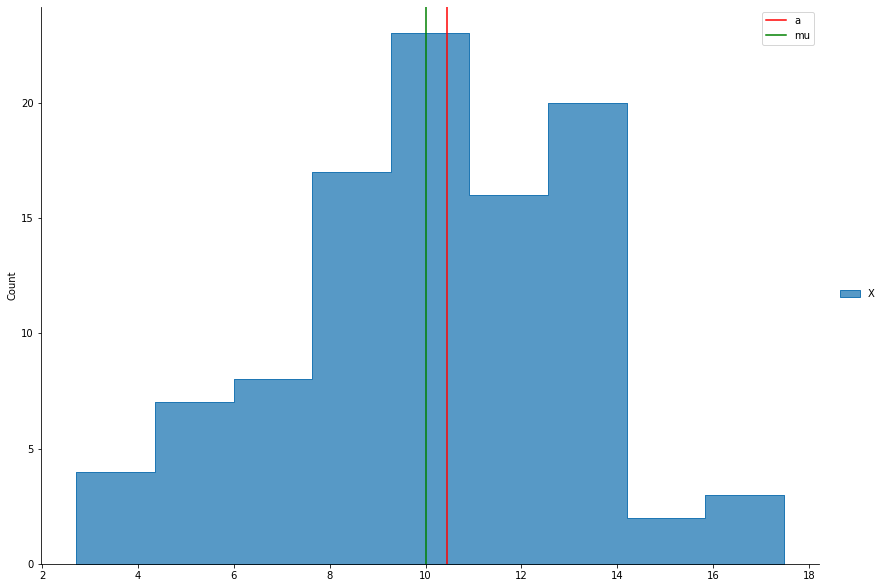

In [226]:
df = pd.DataFrame({"X" : x}, index=pd.Series(range(len(x))))
sns.displot(df, element='step', **_sns)
plt.axvline(a, color="r", label="a")
plt.axvline(mu, color="g", label="mu")
plt.legend()

We use a Z-test when we know the variance.  Under $H_0$, our sample mean follows a distribution of $ N(a, \sigma^2/N) $

We will reject $ H_0 $ if $ | \bar{x} - a | > \gamma $

We do not have a specific alternative hypothesis for this test since $ H_1: \mu \ne a $ still allows $ \mu $ to take many values.

The significance of this test $ \alpha = P($ reject $ H_0 | H_0) = P(\bar{x} < a - \gamma | H_0) + P(\bar{x} > a + \gamma | H_0) $

Let's compute the significance as a function of $\gamma$.


In [227]:
rv = scipy.stats.norm(loc=a, scale=sigma**2/N)
significance_fn = lambda gamma: rv.cdf(a-gamma) + (1 - rv.cdf(a+gamma))
gammas = np.linspace(0, 100, 1000)
significances = np.vectorize(significance_fn)(gammas)

Text(0.5, 1.0, 'Significance vs Gamma')

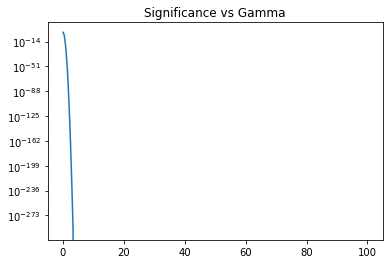

In [228]:
sns.lineplot(x=gammas, y=significances)
plt.yscale('log')
plt.title('Significance vs Gamma')

In [229]:
gamma = gammas[np.argwhere(significances < 0.05)[0]].item()
significance_fn(gamma)

0.02611840689553467

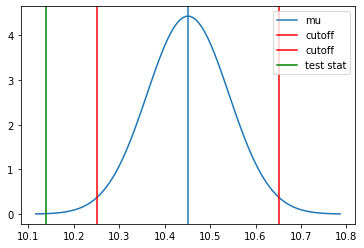

In [230]:
_x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
p_x = rv.pdf(_x)
sns.lineplot(x=_x, y=p_x)
plt.axvline(a, label='mu')
plt.axvline(a+gamma, color='r', label='cutoff')
plt.axvline(a-gamma, color='r', label='cutoff')
plt.axvline(x.mean(), color='g', label='test stat')
plt.legend()

In [231]:
delta = abs(x.mean() - a)
if delta > gamma:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


In [233]:
pvalue = rv.cdf(a - delta)*2
pvalue

0.0005349732024146697

<br>

## One sample, one sided

$ H_0: \mu \geq a $

$ H_1: \mu \lt a $

In [238]:
mu = 10
sigma = 3
N = 100

x = np.random.normal(size=(N,))*sigma + mu
a = np.random.normal()*sigma/10 + mu

print(f'Testing whether mu >= {round(a, 2)}')

Testing whether mu >= 10.36


Again, we assume that the variance of $x$ is known. 

We reject the null hypothesis if $ \bar{x} < \gamma $ where $ \gamma $ is chosen such that the significance of the test, $ \alpha = P($ reject $H_0|H_0 )$, is sufficiently small.  We can compute $ \alpha = P(\bar{x} < \gamma | H_0) = P(\bar{x} < \gamma | \mu = a) $.  We use $ \mu = a $ for the significance computation as it maximizes $ \alpha $ under $ H_0 $.